In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("global air pollution dataset.csv")

## Data Definition

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [4]:
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [5]:
data.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [6]:
data.isna().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

## Data Cleaning

In [7]:
# data['CO AQI Value'] = data['CO AQI Value'].astype('object') 

In [8]:
# Replace Country NULL with City Values
data['Country'].fillna(data['City'], inplace=True)

# Drop City NULL values
data.dropna(0, inplace=True)

C:\Users\pavan\AppData\Local\Temp\ipykernel_4060\271669741.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data.dropna(0, inplace=True)


<AxesSubplot: >

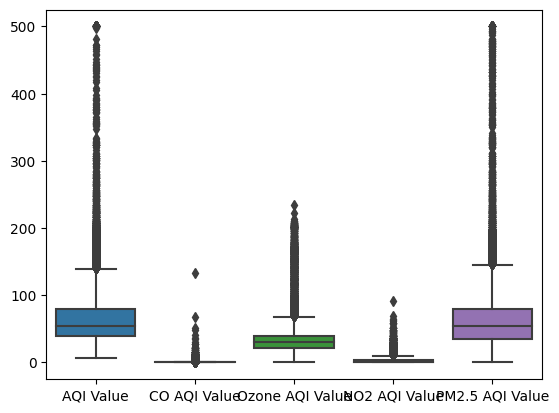

In [9]:
sns.boxplot(data)

In [10]:
Q1 = data.quantile(0.03)
Q3 = data.quantile(0.97)
IQR = Q3 - Q1

data = data[~((data < (Q1)) |(data > (Q3))).any(axis=1)]

C:\Users\pavan\AppData\Local\Temp\ipykernel_4060\3862293631.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.03)
C:\Users\pavan\AppData\Local\Temp\ipykernel_4060\3862293631.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.97)
C:\Users\pavan\AppData\Local\Temp\ipykernel_4060\3862293631.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1)) |(data > (Q3))).any(axis=1)]


<AxesSubplot: >

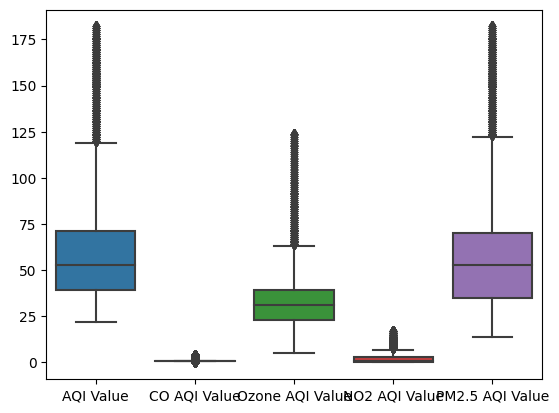

In [11]:
sns.boxplot(data)

In [12]:
data.isna().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

## Exploratory Data Analysis

C:\Users\pavan\AppData\Local\Temp\ipykernel_4060\1067383699.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Blues')


<AxesSubplot: >

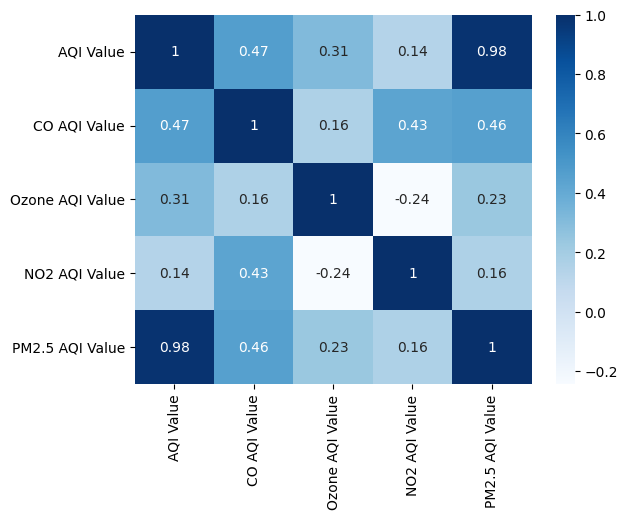

In [13]:
sns.heatmap(data.corr(), annot=True, cmap='Blues')

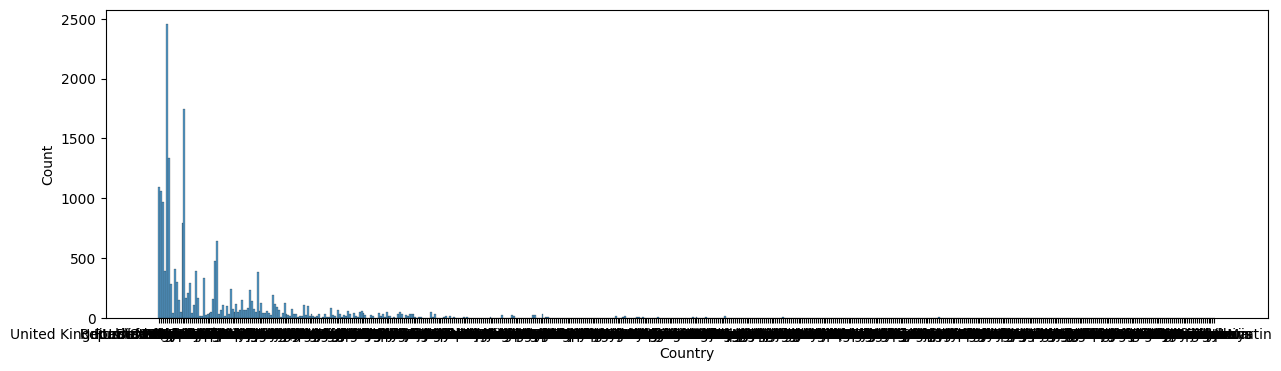

In [14]:
plt.figure(figsize=(15, 4))
sns.histplot(data['Country'])
plt.show()

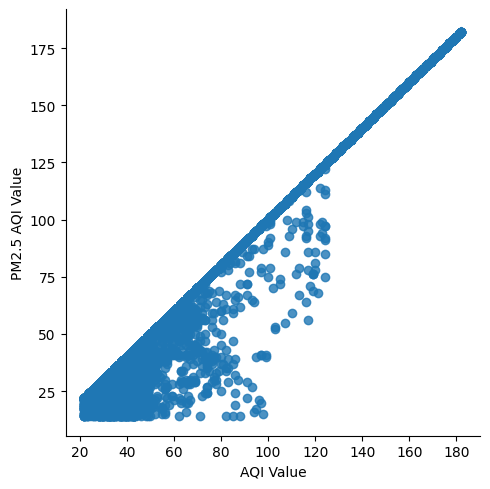

In [15]:
sns.lmplot(data=data, x='AQI Value', y='PM2.5 AQI Value')

<AxesSubplot: xlabel='NO2 AQI Value', ylabel='Ozone AQI Value'>

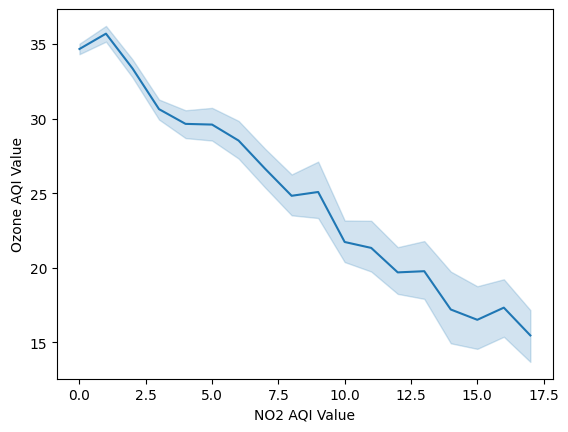

In [16]:
sns.lineplot(data=data, y='Ozone AQI Value', x='NO2 AQI Value')

## Feature Engineering

In [17]:
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate


In [18]:
std_data = (data-data.min(numeric_only=True))/(data.max(numeric_only=True)-data.min(numeric_only=True))
data[['AQI Value', 'CO AQI Value', 'NO2 AQI Value', 'Ozone AQI Value', 'PM2.5 AQI Value']] = std_data[['AQI Value', 'CO AQI Value', 'NO2 AQI Value', 'Ozone AQI Value', 'PM2.5 AQI Value']]
data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,0.18125,Moderate,0.25,Good,0.260504,Good,0.000000,Good,0.220238,Moderate
1,Brazil,Presidente Dutra,0.11875,Good,0.25,Good,0.000000,Good,0.058824,Good,0.160714,Good
2,Italy,Priolo Gargallo,0.27500,Moderate,0.25,Good,0.285714,Good,0.117647,Good,0.309524,Moderate
3,Poland,Przasnysz,0.07500,Good,0.25,Good,0.243697,Good,0.000000,Good,0.035714,Good
5,United States of America,Punta Gorda,0.20000,Moderate,0.25,Good,0.075630,Good,0.647059,Good,0.238095,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
23457,Slovakia,Martin,0.30625,Moderate,0.25,Good,0.285714,Good,0.058824,Good,0.339286,Moderate
23459,France,Sceaux,0.17500,Good,0.25,Good,0.126050,Good,0.294118,Good,0.214286,Good
23460,India,Mormugao,0.17500,Good,0.25,Good,0.142857,Good,0.058824,Good,0.214286,Good
23461,United States of America,Westerville,0.30625,Moderate,0.25,Good,0.327731,Good,0.117647,Good,0.339286,Moderate


In [19]:
_map = {'Moderate': 0.0, 'Good': 1.0, 'Unhealthy for Sensitive Groups': 2.0, 'Unhealthy': 3.0}
data.replace({"AQI Category": _map, "CO AQI Category": _map, "Ozone AQI Category": _map, "NO2 AQI Category": _map, "PM2.5 AQI Category": _map}, inplace=True)

## Model Development

In [20]:
scores = []

### Classification

In [21]:
# from sklearn.preprocessing import train_test_split
train_features = list(set(data.select_dtypes(include=['float64']).columns)-set(["AQI Value", "AQI Category"]))
train_features

['PM2.5 AQI Category',
 'CO AQI Category',
 'Ozone AQI Value',
 'NO2 AQI Category',
 'NO2 AQI Value',
 'PM2.5 AQI Value',
 'CO AQI Value',
 'Ozone AQI Category']

In [22]:
from sklearn.model_selection import train_test_split

train = data[train_features]
labels = data["AQI Category"]

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17786, 8), (1977, 8), (17786,), (1977,))

In [23]:
y_train

9894     0.0
21839    1.0
9991     1.0
9383     1.0
17809    1.0
        ... 
13404    1.0
14208    3.0
6420     0.0
1047     0.0
18738    0.0
Name: AQI Category, Length: 17786, dtype: float64

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
model = dt.fit(X_train, y_train)

In [25]:
dt_train = model.score(X_train, y_train)

In [26]:
dt_test = model.score(X_test, y_test)

In [27]:
scores.append(['Decision Tree Classifier', dt_train, dt_test])

### Regression

In [28]:
# from sklearn.preprocessing import train_test_split
train_features = list(set(data.select_dtypes(include=['float64']).columns)-set(["AQI Value", "AQI Category"]))
train_features

['PM2.5 AQI Category',
 'CO AQI Category',
 'Ozone AQI Value',
 'NO2 AQI Category',
 'NO2 AQI Value',
 'PM2.5 AQI Value',
 'CO AQI Value',
 'Ozone AQI Category']

In [29]:
from sklearn.model_selection import train_test_split

train = data[train_features]
labels = data["AQI Value"]

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17786, 8), (1977, 8), (17786,), (1977,))

In [30]:
y_train

9894     0.36875
21839    0.13125
9991     0.05625
9383     0.16875
17809    0.17500
          ...   
13404    0.17500
14208    0.80000
6420     0.21250
1047     0.21875
18738    0.18750
Name: AQI Value, Length: 17786, dtype: float64

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [32]:
lr_train = model.score(X_train, y_train)

In [33]:
lr_test = model.score(X_test, y_test)

In [34]:
scores.append(['Linear Regressor', lr_train, lr_test])

### Ensemble Modelling

#### Regression

In [35]:
# from sklearn.preprocessing import train_test_split
train_features = list(set(data.select_dtypes(include=['float64']).columns)-set(["AQI Value", "AQI Category"]))
train_features

['PM2.5 AQI Category',
 'CO AQI Category',
 'Ozone AQI Value',
 'NO2 AQI Category',
 'NO2 AQI Value',
 'PM2.5 AQI Value',
 'CO AQI Value',
 'Ozone AQI Category']

In [36]:
from sklearn.model_selection import train_test_split

train = data[train_features]
labels = data["AQI Value"]

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17786, 8), (1977, 8), (17786,), (1977,))

In [37]:
y_train

9894     0.36875
21839    0.13125
9991     0.05625
9383     0.16875
17809    0.17500
          ...   
13404    0.17500
14208    0.80000
6420     0.21250
1047     0.21875
18738    0.18750
Name: AQI Value, Length: 17786, dtype: float64

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_r = RandomForestRegressor()
model = rf_r.fit(X_train, y_train)

In [39]:
rf_r_train = rf_r.score(X_train, y_train)

In [40]:
rf_r_test = rf_r.score(X_test, y_test)

In [41]:
scores.append(['Random Forest Regressor', rf_r_train, rf_r_test])

#### Classification

In [42]:
# from sklearn.preprocessing import train_test_split
train_features = list(set(data.select_dtypes(include=['float64']).columns)-set(["AQI Value", "AQI Category"]))
train_features

['PM2.5 AQI Category',
 'CO AQI Category',
 'Ozone AQI Value',
 'NO2 AQI Category',
 'NO2 AQI Value',
 'PM2.5 AQI Value',
 'CO AQI Value',
 'Ozone AQI Category']

In [43]:
from sklearn.model_selection import train_test_split

train = data[train_features]
labels = data["AQI Category"]

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17786, 8), (1977, 8), (17786,), (1977,))

In [44]:
y_train

9894     0.0
21839    1.0
9991     1.0
9383     1.0
17809    1.0
        ... 
13404    1.0
14208    3.0
6420     0.0
1047     0.0
18738    0.0
Name: AQI Category, Length: 17786, dtype: float64

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_c = DecisionTreeClassifier()
model = rf_c.fit(X_train, y_train)

In [46]:
rf_c_train = rf_c.score(X_train, y_train)

In [47]:
rf_c_test = rf_c.score(X_test, y_test)

In [48]:
scores.append(['Random Forest Classifier', rf_c_train, rf_c_test])

## Model Comparision and Evaluation

In [49]:
pd.DataFrame(scores, columns=['Model', 'Training Accuracy', 'Testing Accuracy'])

,Model,Training Accuracy,Testing Accuracy
0,Decision Tree Classifier,1.000000,1.000000
1,Linear Regressor,0.976053,0.978778
2,Random Forest Regressor,0.999988,0.999943
3,Random Forest Classifier,1.000000,1.000000
